<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [268]:
from google.colab import drive
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import statsmodels.api as sm

In [269]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [270]:
cars=pd.read_csv('drive/MyDrive/ML_course/cars.csv')

In [271]:
cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [272]:
cars.Price.describe()

,Price
count,1.000000e+02
mean,1.574000e+06
std,1.000265e+06
min,4.500000e+05
25%,7.000000e+05
50%,1.300000e+06
75%,2.500000e+06
max,4.000000e+06


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [273]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [274]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [275]:
for i in cars.select_dtypes(include='object').columns:
  print (i, cars[i].nunique())

Brand 11
Model 58
Fuel_Type 2
Transmission 2
Owner_Type 3


In [276]:
for i in ['Fuel_Type', 'Transmission', 'Owner_Type']:
  print (cars[i].value_counts())

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64
Transmission
Automatic    57
Manual       43
Name: count, dtype: int64
Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64


В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (Fuel_type, Transmission)
- 2 мультикатегоріальних (Brand, Model) зі значеннями, для яких немає відношення порядку
- 1 колонки, в яких можна встановити відношення порядку (Owner_Type: First, Second, Third)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [277]:
x=cars.iloc[:, :-1]

In [278]:
y=cars.Price

In [279]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [280]:
fuel={'Petrol':1, 'Diesel':0}
X_train['Fuel_Type_code']=X_train.Fuel_Type.map(fuel)
X_test['Fuel_Type_code']=X_test.Fuel_Type.map(fuel)
transm={'Automatic':1, 'Manual':0}
X_train['Transmission_code']=X_train.Transmission.map(transm)
X_test['Transmission_code']=X_test.Transmission.map(transm)

In [281]:
enc=OneHotEncoder()
enc.fit(X_train[['Brand']])

OneHotEncoder()

In [282]:
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [283]:
brand_code=enc.transform(X_train[['Brand']]).toarray()

In [284]:
X_train[enc.categories_[0]]=brand_code

In [285]:
brand_code_test=enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]]=brand_code_test

In [286]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [287]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [288]:
cars_train=pd.concat([X_train.select_dtypes(include='int64'), y_train], axis=1)

<Axes: >

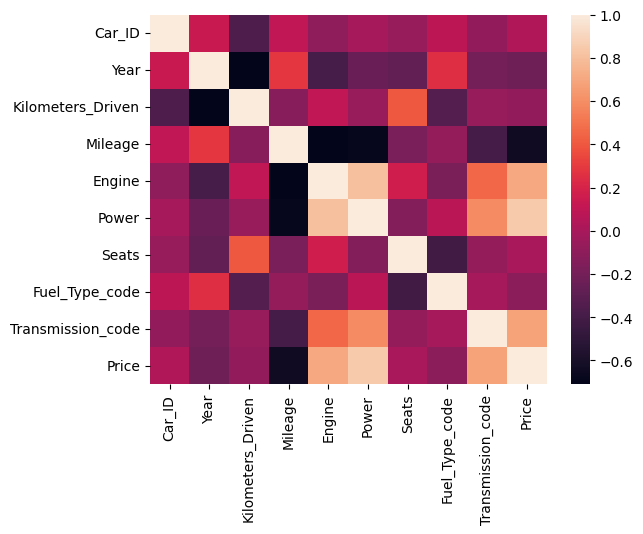

In [289]:
sns.heatmap(cars_train.corr())

Найбільше корелюють колонки негативно: Mileage,  позитивно: Engine, Power,Transmission code.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [290]:
X_train=X_train.select_dtypes(exclude='object')
X_test=X_test.select_dtypes(exclude='object')

In [291]:
lr=LinearRegression()
lr.fit(X_train, y_train)
test_pred_lr=lr.predict(X_test)
train_pred_lr=lr.predict(X_train)

In [292]:
root_mean_squared_error(y_train, train_pred_lr), root_mean_squared_error(y_test, test_pred_lr)

(210293.57828151877, 258181.56112032934)

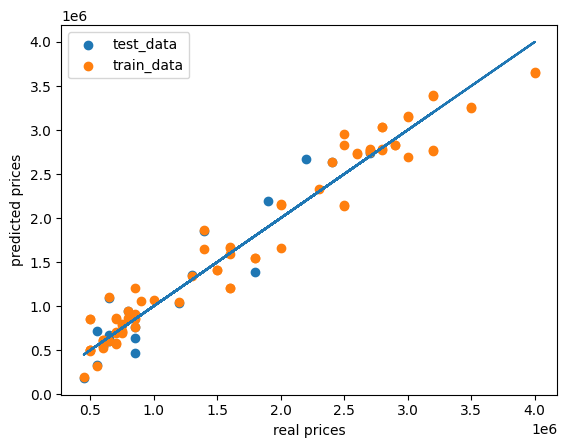

In [293]:
plt.scatter(y_test, test_pred_lr, label='test_data')
plt.scatter(y_train, train_pred_lr, label='train_data')
plt.plot(y, y)
plt.xlabel('real prices')
plt.ylabel('predicted prices')
plt.legend();

In [294]:
X_train_c=sm.add_constant(X_train)
model=sm.OLS(y_train, X_train_c)
results=model.fit()
params=results.params

In [295]:
X_test_c = sm.add_constant(X_test)
predictions=results.predict(X_test_c)
pr_train=results.predict(X_train_c)

In [296]:
root_mean_squared_error(y_test, predictions)

258181.561120302

In [297]:
root_mean_squared_error(y_train, pr_train)

210293.5782815185

In [298]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        20:41:33   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.594e+07   1.01e+08      0.158      0.875   -1.86e+08    2.18e+08
Car_ID              198.4165   1193.820      0.166      0.869   -2190.412    2587.245
Year              -7821.1909   5.43e+04     -0.144      0.886   -1.17e+05    1.01e+05
Kilometers_Driven   -10.2948      7.104     -1.449      0.153     -24.509       3.920
Mileage           -3.862e+04   1.71e+04     -2.259      0.028   -7.28e+04   -4408.773
Engine              -32.5523    110.982     -0.293      0.770    -254.627     189.523
Power              6101.0713    926.123      6.588      0.000    4247.904    7954.239
Seats             -2899.2570   5.69e+04     -0.051      0.960   -1.17e+05    1.11e+05
Fuel_Type_code    -3.678e+05   9.14e+04     -4.026      0.000   -5.51e+05   -1.85e+05
Transmission_code  2.395e+05   9.03e+04      2.653      0.010    5.89e+04     4.2e+05
Audi               2.206e+06   9.13e+06      0.242      0.810   -1.61e+07    2.05e+07
BMW                 2.18e+06   9.18e+06      0.238      0.813   -1.62e+07    2.05e+07
Ford               1.147e+06   9.14e+06      0.125      0.901   -1.71e+07    1.94e+07
Honda              1.261e+06   9.17e+06      0.137      0.891   -1.71e+07    1.96e+07
Hyundai            9.424e+05   9.17e+06      0.103      0.919   -1.74e+07    1.93e+07
Mahindra           8.739e+05    9.2e+06      0.095      0.925   -1.75e+07    1.93e+07
Maruti             1.057e+06   9.19e+06      0.115      0.909   -1.73e+07    1.94e+07
Mercedes           2.185e+06   9.13e+06      0.239      0.812   -1.61e+07    2.05e+07
Tata               1.321e+06    9.2e+06      0.144      0.886   -1.71e+07    1.97e+07
Toyota             1.573e+06    9.2e+06      0.171      0.865   -1.68e+07       2e+07
Volkswagen         1.192e+06   9.14e+06      0.130      0.897   -1.71e+07    1.95e+07
Owner_Type_Codes   6.476e+04   7.26e+04      0.892      0.376   -8.06e+04     2.1e+05
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.311
Skew:                           0.104   Prob(JB):                        0.856
Kurtosis:                       2.776   Cond. No.                     4.83e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Виходячи зі значень rmse 258181 для тестувального дата сету порівняно зі стандартним квадратичним відхиленням, що становить 1000265, модель виглядає непогано, а також зважаючи на показники R2 та Adj R2.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [299]:
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

In [300]:
lr_scale=LinearRegression()
lr_scale.fit(X_train_scaled, y_train)
test_pred_lr_sc=lr_scale.predict(X_test_scaled)
train_pred_lr_sc=lr_scale.predict(X_train_scaled)

In [301]:
root_mean_squared_error(y_train, train_pred_lr_sc), root_mean_squared_error(y_test, test_pred_lr_sc)

(210293.57828151854, 258181.56112032832)

In [303]:
pd.concat([pd.Series(X_train.columns, name='feature'), pd.Series(lr_scale.coef_, name='coef')], axis=1).sort_values(by='coef', ascending=False)

,feature,coef
5,Power,496769.214899
16,Mercedes,210048.781148
10,BMW,208407.313783
9,Audi,205600.147769
8,Transmission_code,116693.768206
20,Owner_Type_Codes,42344.952815
18,Toyota,15805.701511
0,Car_ID,5608.685421
6,Seats,-2148.924549
1,Year,-8765.645714


Найбільш негативно на вартість автомобіля впливає Тип пального "бензин", паливна ефективність та пробіг. Найбільш позитивно валиває потужність двигуна та автоматична коробка передач. Це виглядає логічним.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [304]:
X_train_scaled=sm.add_constant(X_train_scaled)
X_test_scaled=sm.add_constant(X_test_scaled)
model=sm.OLS(y_train, X_train_scaled)
results=model.fit()
params=results.params

In [305]:
predictions_scaled=results.predict(X_test_scaled)
train_pred_scaled=results.predict(X_train_scaled)

In [306]:
root_mean_squared_error(y_test, predictions_scaled)

258181.56112032855

In [307]:
root_mean_squared_error(y_train, train_pred_scaled)

210293.57828151857

In [308]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        20:41:34   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.74e+04     61.363      0.000    1.63e+06    1.73e+06
x1          5608.6854   3.37e+04      0.166      0.869   -6.19e+04    7.31e+04
x2         -8765.6457   6.09e+04     -0.144      0.886   -1.31e+05    1.13e+05
x3          -9.44e+04   6.51e+04     -1.449      0.153   -2.25e+05    3.59e+04
x4         -1.317e+05   5.83e+04     -2.259      0.028   -2.48e+05    -1.5e+04
x5         -2.138e+04   7.29e+04     -0.293      0.770   -1.67e+05    1.24e+05
x6          4.968e+05   7.54e+04      6.588      0.000    3.46e+05    6.48e+05
x7         -2148.9245   4.22e+04     -0.051      0.960   -8.66e+04    8.23e+04
x8         -1.838e+05   4.57e+04     -4.026      0.000   -2.75e+05   -9.25e+04
x9          1.167e+05    4.4e+04      2.653      0.010    2.87e+04    2.05e+05
x10         2.056e+05   3.05e+04      6.738      0.000    1.45e+05    2.67e+05
x11         2.084e+05   3.19e+04      6.532      0.000    1.45e+05    2.72e+05
x12        -1.182e+05   3.37e+04     -3.507      0.001   -1.86e+05   -5.08e+04
x13        -6.275e+04   3.44e+04     -1.825      0.073   -1.32e+05    6034.235
x14        -1.523e+05    2.9e+04     -5.247      0.000    -2.1e+05   -9.42e+04
x15        -1.409e+05   2.97e+04     -4.747      0.000      -2e+05   -8.15e+04
x16        -1.123e+05   2.91e+04     -3.856      0.000   -1.71e+05    -5.4e+04
x17           2.1e+05   3.14e+04      6.682      0.000    1.47e+05    2.73e+05
x18          -6.6e+04   3.95e+04     -1.672      0.100   -1.45e+05     1.3e+04
x19         1.581e+04   3.47e+04      0.456      0.650   -5.36e+04    8.52e+04
x20        -9.297e+04      3e+04     -3.097      0.003   -1.53e+05   -3.29e+04
x21         4.234e+04   4.75e+04      0.892      0.376   -5.27e+04    1.37e+05
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.311
Skew:                           0.104   Prob(JB):                        0.856
Kurtosis:                       2.776   Cond. No.                     6.72e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [309]:
p_values=pd.DataFrame(results.pvalues.iloc[1:], columns=['pvalue']).reset_index(drop=True).set_index(X_train.columns)

In [310]:
features=p_values[p_values['pvalue']<0.05].index

In [311]:
features

Index(['Mileage', 'Power', 'Fuel_Type_code', 'Transmission_code', 'Audi',
       'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes',
       'Volkswagen'],
      dtype='object')

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [312]:
X_train_upd=pd.DataFrame(X_train_scaled[:, 1:], columns=X_train.columns)[features]
X_test_upd=pd.DataFrame(X_test_scaled[:, 1:], columns=X_train.columns)[features]

In [313]:
X_train_upd=sm.add_constant(X_train_upd)
X_test_upd=sm.add_constant(X_test_upd)
model=sm.OLS(y_train.reset_index(drop=True), X_train_upd.reset_index(drop=True))
results=model.fit()
results.params

,0
const,1.680000e+06
Mileage,-1.430094e+05
Power,4.556152e+05
Fuel_Type_code,-1.337141e+05
Transmission_code,1.310778e+05
Audi,2.496895e+05
BMW,2.949781e+05
Ford,-4.855211e+04
Hyundai,-1.027479e+05
Mahindra,-8.538214e+04


In [314]:
predictions_upd=results.predict(X_test_upd)
train_pred_upd=results.predict(X_train_upd)

In [315]:
root_mean_squared_error(y_test, predictions_upd)

233241.8618446409

In [316]:
root_mean_squared_error(y_train, train_pred_upd)

227824.30180439973

In [317]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           4.12e-39
Time:                        20:41:34   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+04     60.360      0.000    1.62e+06    1.74e+06
Mileage            -1.43e+05   4.02e+04     -3.561      0.001   -2.23e+05   -6.29e+04
Power              4.556e+05    5.1e+04      8.941      0.000    3.54e+05    5.57e+05
Fuel_Type_code    -1.337e+05   2.99e+04     -4.479      0.000   -1.93e+05   -7.41e+04
Transmission_code  1.311e+05    4.3e+04      3.046      0.003    4.52e+04    2.17e+05
Audi               2.497e+05   3.53e+04      7.075      0.000    1.79e+05     3.2e+05
BMW                 2.95e+05   3.78e+04      7.802      0.000     2.2e+05     3.7e+05
Ford              -4.855e+04   3.52e+04     -1.378      0.173   -1.19e+05    2.18e+04
Hyundai           -1.027e+05   3.17e+04     -3.238      0.002   -1.66e+05   -3.94e+04
Mahindra          -8.538e+04   3.02e+04     -2.825      0.006   -1.46e+05    -2.5e+04
Maruti            -5.118e+04   3.07e+04     -1.665      0.101   -1.13e+05    1.02e+04
Mercedes           2.767e+05   3.68e+04      7.515      0.000    2.03e+05     3.5e+05
Volkswagen        -2.375e+04    3.4e+04     -0.699      0.487   -9.16e+04    4.41e+04
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.084
Skew:                           0.279   Prob(JB):                        0.582
Kurtosis:                       2.879   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [318]:
feat_upd=p_values[p_values['pvalue']<0.25].index

In [319]:
X_train_final=pd.DataFrame(X_train_scaled[:, 1:], columns=X_train.columns)[feat_upd]
X_test_final=pd.DataFrame(X_test_scaled[:, 1:], columns=X_test.columns)[feat_upd]

In [320]:
X_train_final=sm.add_constant(X_train_final)
X_test_final=sm.add_constant(X_test_final)
model=sm.OLS(y_train.reset_index(drop=True), X_train_final.reset_index(drop=True))
results=model.fit()
results.params

,0
const,1.680000e+06
Kilometers_Driven,-7.887396e+04
Mileage,-1.213232e+05
Power,4.666618e+05
Fuel_Type_code,-1.629442e+05
Transmission_code,1.175415e+05
Audi,1.949556e+05
BMW,2.092733e+05
Ford,-1.139975e+05
Honda,-7.974914e+04


In [321]:
predictions_final=results.predict(X_test_final)
train_pred_final=results.predict(X_train_final)

In [322]:
root_mean_squared_error(y_test, predictions_final)

250977.95444491834

In [323]:
root_mean_squared_error(y_train, train_pred_final)

212184.26418949346

In [324]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           4.85e-38
Time:                        20:41:34   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+04     63.341      0.000    1.63e+06    1.73e+06
Kilometers_Driven -7.887e+04   3.47e+04     -2.275      0.026   -1.48e+05   -9600.782
Mileage           -1.213e+05   4.52e+04     -2.685      0.009   -2.12e+05    -3.1e+04
Power              4.667e+05   4.93e+04      9.475      0.000    3.68e+05    5.65e+05
Fuel_Type_code    -1.629e+05   3.14e+04     -5.184      0.000   -2.26e+05      -1e+05
Transmission_code  1.175e+05   4.15e+04      2.832      0.006    3.46e+04       2e+05
Audi                1.95e+05   3.86e+04      5.051      0.000    1.18e+05    2.72e+05
BMW                2.093e+05   4.53e+04      4.620      0.000    1.19e+05       3e+05
Ford               -1.14e+05      4e+04     -2.851      0.006   -1.94e+05   -3.41e+04
Honda             -7.975e+04   3.83e+04     -2.085      0.041   -1.56e+05   -3324.825
Hyundai           -1.518e+05    3.7e+04     -4.107      0.000   -2.26e+05    -7.8e+04
Mahindra          -1.444e+05   3.47e+04     -4.163      0.000   -2.14e+05   -7.51e+04
Maruti            -1.159e+05   3.64e+04     -3.189      0.002   -1.89e+05   -4.33e+04
Mercedes           2.048e+05    4.2e+04      4.874      0.000    1.21e+05    2.89e+05
Tata              -9.701e+04   4.27e+04     -2.269      0.027   -1.82e+05   -1.16e+04
Volkswagen        -9.073e+04   3.94e+04     -2.304      0.024   -1.69e+05   -1.21e+04
==============================================================================
Omnibus:                        0.317   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.436
Skew:                           0.137   Prob(JB):                        0.804
Kurtosis:                       2.763   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

З останніх 3 моделей я би обрала модель з незалежними змінними, стат. значимість яких на рівні 0.05, оскільки ця модель має вище значення F статистики серед інших моделей, трохи менше значення ВІС, а також менший розрив у функції втрат для тренувального та тестувального дата сету.